As we've discussed [in other notebooks](https://napsterinblue.github.io/notes/machine_learning/neural_nets/conv_intuition/#why-convolution), a key reason that we employ convolution to our image networks is to adjust the complexity of our model.

When we apply `N` convolutional filters to a given layer, the following layer has final dimension equal to `N`-- one for each channel.

## 1x1 Convolution

Because convolution gets applied across all channels, a `1x1` convolution is less about capturing features in a given area of any channel, but instead translating information into other, easier-to-compute dimensions.

### Intuition

It's helpful to consider a `1x1` convolution as a sort of "Fully Connected sub-layer" that maps the value in all channels to one output cell in the next layer.

You can see that this intuition holds below, considering that we're evaluating 32 input values against 32 weights-- basic hidden layer stuff.

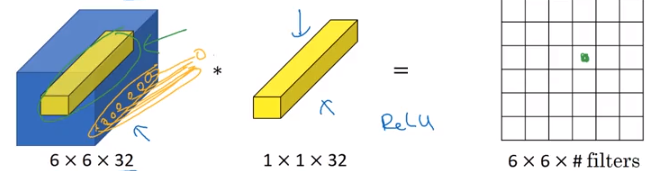

In [1]:
from IPython.display import Image

Image('images/one_by_one.png')

Additionally, applying more `1x1` convolution filters allows us to translate between the final input dimension to arbitrarily-many dimensions for the next layer, while maintaining the information gain of training (because each FC sub-layer will still update on backprop like a normal network).

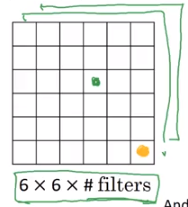

In [2]:
Image('images/net_in_net.png')

But how is this useful?

### Computation Benefits

Consider a simple case where we want to go from a `28x28x192` layer via 32 `5x5` filters 

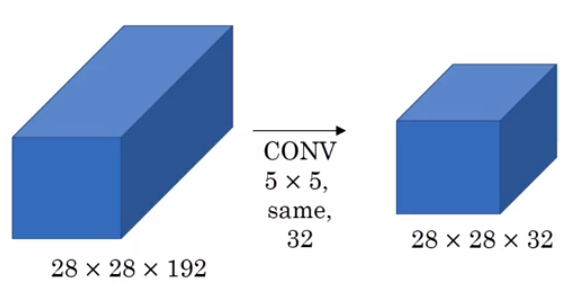

In [3]:
Image('images/shrink_channels_before.png')

The amount of calculations that happen here are a direct function of: 

- The dimensions of the output layer
- The number of channels in the input layer
- The size of the filters

Giving us

$ (28 * 28 * 32) * (192) * (5 * 5) \approx 120M$

Now see what happens when we use `1x1` convolution to create an intermediate layer.

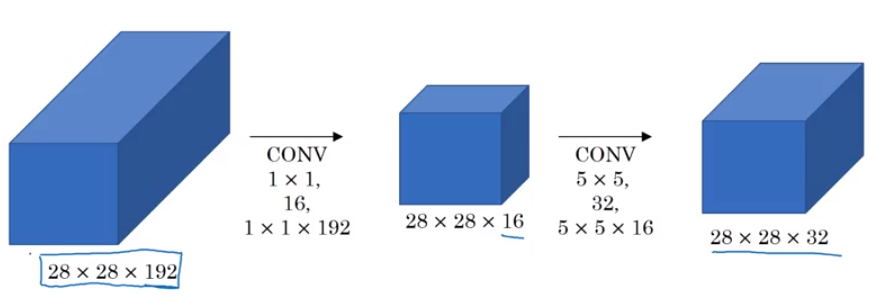

In [4]:
Image('images/shrink_channels_after.png')

Enumerating the calculations happens in two stages.

First, going from the input layer to the hidden layer.

$ (28 * 28 * 16) * (192) * (1 * 1) \approx 2.4M $

Then going from the hidden layer to the output layer

$ (28 * 28 * 32) * (16) * (5 * 5) \approx 10M $

Summing the two, we get 12 Million -- **nearly a tenth of the number of computations** as before, while still outputting a `28x28x32` layer, and maintaining strong information gain by employing multiple "Fully Connected sub-layers" as mentioned above.

## Inception Network

### Block Level

And so the Inception Network developed by Google uses this to great effect. Instead of figuring out what filter/kernel size to apply from layer to layer, they build in `1x1`, `3x3`, `5x5`, as well as a `Max-Pool` layer for good measure, then concatenate them all together into a huge, `256`-channel output. They leave it to backpropagation to figure out which sections of the output are worth using for information gain.

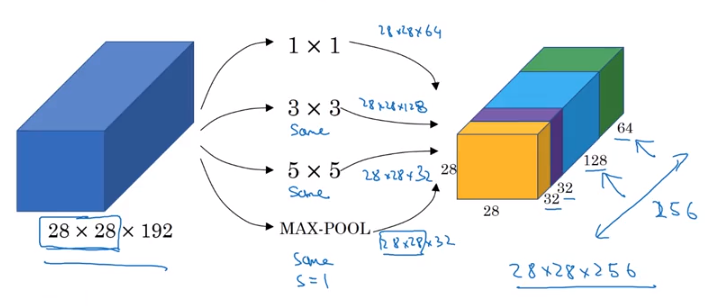

In [5]:
Image('images/inception_motivation.png')

Mechanically, as above, they leverage the computation-reduction afforded by `1x1` filters for each component. This practice is often referred to as a **bottleneck layer** wherein you shrink the representation before expanding again via convolution filters.

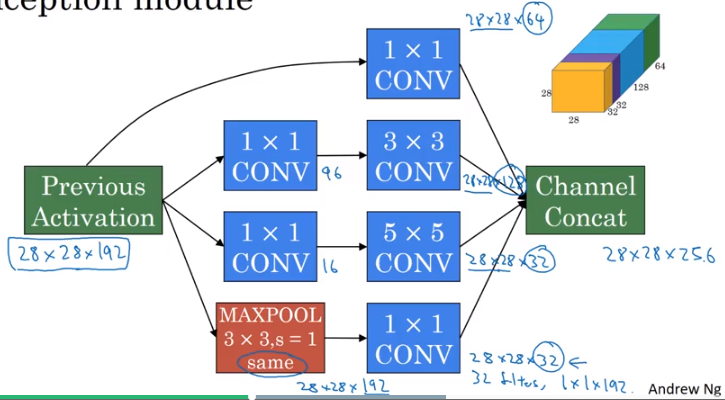

In [6]:
Image('images/inception_block.png')

This results in:

- Very flexible learning strategies
- Relatively cheap computation

### At Scale

So much so, that the architecture is implemented as a bunch of these blocks chained together

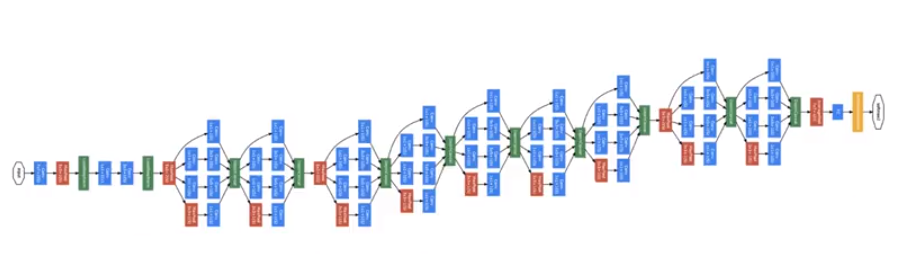

In [7]:
Image('images/inception_unzoomed.png')

## Using It

### V3

As we mentioned in the [VGG architecture notebook](https://napsterinblue.github.io/notes/machine_learning/neural_nets/vgg/), the Inception architecture is available for use in `keras` (and also is a heafty download if you haven't yet used it!)

In [8]:
from keras.applications import inception_v3

model = inception_v3.InceptionV3()

Using TensorFlow backend.


I'll spare you scrolling through `model.summary()`, it's pretty huge.

In [9]:
len(model.layers)

313

    Total params: 23,851,784
    Trainable params: 23,817,352
    Non-trainable params: 34,432

[Documentation is available here](https://keras.io/applications/#inceptionv3)

### Inception ResNet

Alternatively, there is promising work being done to combine the best elements of the Inception framework with the information-passing elements [residual Neural Networks](https://napsterinblue.github.io/notes/machine_learning/computer_vision/resnets/).

You can employ the latest version of this work, again using `keras`, with the following.

In [10]:
from keras.applications import inception_resnet_v2

model = inception_resnet_v2.InceptionResNetV2()

It's even bigger

In [11]:
len(model.layers)

782

    Total params: 55,873,736
    Trainable params: 55,813,192
    Non-trainable params: 60,544